## Dicoding Submission 
## Belajar Machine Learning untuk Pemula
## Data diri :
## Nama : Damar Djati Wahyu Kemala
## Email : damar.3006@students.amikom.ac.id
## No telp : 0882-150-286-99

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-24 05:23:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.39MB/s    in 77s     

2020-10-24 05:24:38 (3.98 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [16]:
import zipfile,os

In [4]:
# Mengekstrak File zip rockpaperscissors.. 
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [17]:
# Membuat Train Directory dan Validation Directory..
base_dir = '/tmp/rockpaperscissors'
train_dirc = os.path.join(base_dir, 'train')
valids_dirc = os.path.join(base_dir, 'val') 

In [18]:
os.mkdir(train_dirc)
os.mkdir(valids_dirc)

In [19]:
os.listdir('/tmp/rockpaperscissors/')

['rock',
 'paper',
 'train',
 'scissors',
 'val',
 'README_rpc-cv-images.txt',
 'rps-cv-images']

In [20]:
# Membuat direktori terhadap masing masing item (rock, paper, scissor) (Proses Split Data)
rocks_dirc = os.path.join(base_dir, 'rock')
papers_dirc = os.path.join(base_dir, 'paper')
scissors_dirc = os.path.join(base_dir, 'scissors')

In [21]:
# Set pada train direktory..  (Proses Split Data)
to_train_rocks = os.path.join(train_dirc, 'rock')
to_train_papers = os.path.join(train_dirc, 'paper')
to_train_scissors = os.path.join(train_dirc, 'scissors')

In [22]:
# Set pada validation direktory.. (Proses Split Data)
to_valida_rocks = os.path.join(valids_dirc, 'rock')
to_valida_papers = os.path.join(valids_dirc, 'paper')
to_valida_scissors = os.path.join(valids_dirc, 'scissors')

In [23]:
# membuat direktori untuk set data latih.. (Masih proses Split Data)
os.mkdir(to_train_rocks)
os.mkdir(to_train_papers)
os.mkdir(to_train_scissors)

In [24]:
# membuat direktori untuk set data validastion.. (Masih proses Split Data)
os.mkdir(to_valida_rocks)
os.mkdir(to_valida_papers)
os.mkdir(to_valida_scissors)

In [25]:
# import library train test split..
from sklearn.model_selection import train_test_split

In [26]:
# Melakukan Train Test split terhadap data..

# Menetapkan ukuran validasi set menjadi 40% dari dataset..
# Serta memisahkan Data direktory menjadi Data Training dan Data Validation..
to_train_rocks_dirc, to_valida_rocks_dirc = train_test_split(os.listdir(rocks_dirc), test_size = 0.40)
to_train_papers_dirc, to_valida_papers_dirc = train_test_split(os.listdir(papers_dirc), test_size = 0.40)
to_train_scissors_dirc, to_valida_scissors_dirc = train_test_split(os.listdir(scissors_dirc), test_size = 0.40) 

In [27]:
import shutil

In [28]:
for f in to_train_rocks_dirc:
  shutil.copy(os.path.join(rocks_dirc, f), os.path.join(to_train_rocks, f))

for f in to_train_papers_dirc:
  shutil.copy(os.path.join(papers_dirc, f), os.path.join(to_train_papers, f))

for f in to_train_scissors_dirc:
  shutil.copy(os.path.join(scissors_dirc, f), os.path.join(to_train_scissors, f))

for f in to_valida_rocks_dirc:
  shutil.copy(os.path.join(rocks_dirc, f), os.path.join(to_valida_rocks, f))

for f in to_valida_papers_dirc:
  shutil.copy(os.path.join(papers_dirc, f), os.path.join(to_valida_papers, f))

for f in to_valida_scissors_dirc:
  shutil.copy(os.path.join(scissors_dirc, f), os.path.join(to_valida_scissors, f))

In [29]:
from tensorflow.keras.optimizers import RMSprop

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
trains_datagents = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
testing_datagents = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

## Proses untuk Image Data Generator

In [33]:
trains_generats = trains_datagents.flow_from_directory (
    train_dirc,
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)
valida_generats = testing_datagents.flow_from_directory (
    valids_dirc,
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [34]:
shows_sequential_models = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape = (150,150,3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512,activation= 'relu'),
      tf.keras.layers.Dense(3, activation= 'softmax')
])

shows_sequential_models.compile(
    loss= 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [35]:
shows_sequential_models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [37]:
# Melakukan Pengoptimalan terhadap multi-class crossentropy loss
from keras.optimizers import SGD
optimal = SGD(lr=0.01, momentum=0.9)
shows_sequential_models.compile(loss = 'categorical_crossentropy', optimizer=optimal, metrics=['accuracy'])

In [42]:
# Menggunakan Callback untuk menghindari overfitting..
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', verbose=1, save_best_only=True)

history = shows_sequential_models.fit (
    trains_generats,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = valida_generats,
    validation_steps = 27,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.39847, saving model to model.h5
41/41 - 15s - loss: 0.3892 - accuracy: 0.8552 - val_loss: 0.3985 - val_accuracy: 0.8727
Epoch 2/20

Epoch 00002: val_loss improved from 0.39847 to 0.26753, saving model to model.h5
41/41 - 15s - loss: 0.2847 - accuracy: 0.9017 - val_loss: 0.2675 - val_accuracy: 0.9236
Epoch 3/20

Epoch 00003: val_loss did not improve from 0.26753
41/41 - 15s - loss: 0.2551 - accuracy: 0.9116 - val_loss: 0.2971 - val_accuracy: 0.8900
Epoch 4/20

Epoch 00004: val_loss improved from 0.26753 to 0.17580, saving model to model.h5
41/41 - 15s - loss: 0.1805 - accuracy: 0.9474 - val_loss: 0.1758 - val_accuracy: 0.9398
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.17580
41/41 - 15s - loss: 0.2276 - accuracy: 0.9192 - val_loss: 0.2249 - val_accuracy: 0.9167
Epoch 6/20

Epoch 00006: val_loss improved from 0.17580 to 0.11035, saving model to model.h5
41/41 - 15s - loss: 0.1815 - accuracy: 0.9367 - val_loss: 0.1104 -

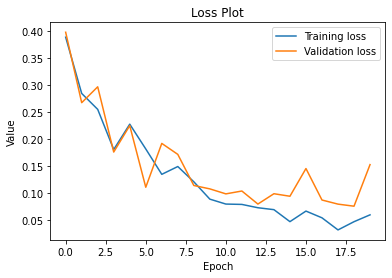

In [44]:
# Grafik untuk Loss Train dan Loss Validation..
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label ='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

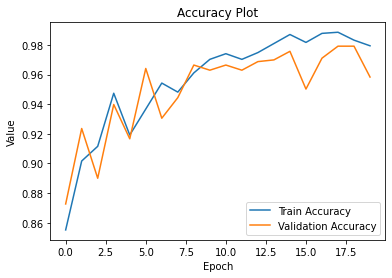

In [47]:
# Grafik untuk Akurasi Train dan Akurasi validation..
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Saving slimss-hand.png to slimss-hand.png
slimss-hand.png
kertas


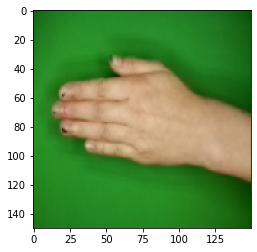

In [64]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for file_myimage in uploaded.keys():

  path = file_myimage
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images= np.vstack([x])
  classes = shows_sequential_models.predict(images, batch_size=10)

  print(file_myimage)
  if classes[0,0] !=0:
    print('kertas')
  elif classes[0,1] !=0:
    print('batu')
  else:
    print('gunting')